In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [6]:
import pandas as pd
import numpy as np
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)
print(df.shape)
print(df)

(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11     3.2705      52.0  4.77

In [7]:
y = calihouses.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


In [8]:
from timeit import default_timer as timer
start_ho = timer()
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
end_ho = timer()
time_ho = (end_ho - start_ho)
print(predictions)

[2.12516713 1.53541739 2.48642121 ... 0.8197649  1.95171366 5.07408434]


In [9]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('dark')
plot = sns.scatterplot(y_test, predictions)
plot.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [10]:
start_ho_score = timer()
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, predictions)
print(ho_score)
end_ho_score = timer()
ho_score_time = (end_ho_score - start_ho_score)

-0.5209400789755116


In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

In [12]:
X = np.array(df)
start_kfold = timer()
lm_k = linear_model.LinearRegression()
k_predictions = cross_val_predict(lm_k, X, y, cv=10)
print(k_predictions)
end_kfold = timer()
kfold_time = (end_kfold - start_kfold)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


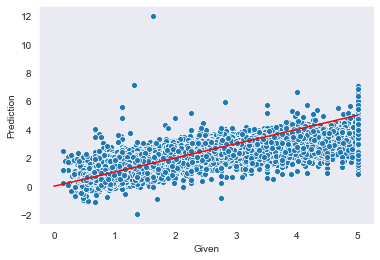

In [13]:
plot_k = sns.scatterplot(y, k_predictions)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [14]:
from sklearn.model_selection import cross_val_score

-0.550952429695665


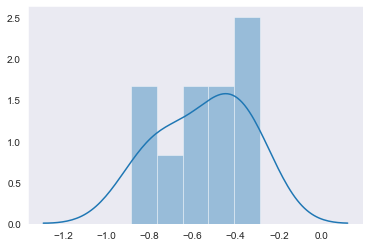

In [15]:
kfold_score_start = timer()
kfold_scores = cross_val_score(lm_k, X, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)
sns.distplot(kfold_scores, bins=5)

In [16]:
start_LOO = timer()
LOO_predictions = cross_val_predict(lm_k, X, y, cv=(len(X)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)

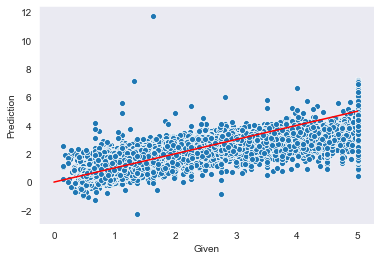

In [17]:
plot_LOO = sns.scatterplot(y, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [18]:
LOO_score_start = timer()
LOO_score = cross_val_score(lm_k, X, y, cv=(len(X)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

-0.5282462043712457


In [19]:
print("Hold out method took", time_ho, "seconds to generate a model and", ho_score_time ,"seconds to generate a MSE of", ho_score)
print("K-Fold method took", kfold_time, 'seconds to generate a model and', kfold_score_time, 'seconds to generate a MSE of', kfold_scores.mean())
print("Leave One Out Cross Validation method took", LOO_time, 'seconds to generate a model and', LOO_score_time, 'seconds to generate a MSE of', LOO_score)

Hold out method took 0.06145559999999506 seconds to generate a model and 0.0019232000000002358 seconds to generate a MSE of -0.5209400789755116
K-Fold method took 0.12043779999999771 seconds to generate a model and 0.1216230000000067 seconds to generate a MSE of -0.550952429695665
Leave One Out Cross Validation method took 210.67736089999997 seconds to generate a model and 211.7684501 seconds to generate a MSE of -0.5282462043712457
